# Visualizer Tests (OLD)

In [1]:
import numpy as np
import pyaudio
import wave
import struct
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as colors
import random
import scipy.signal
import scipy.io.wavfile
from celluloid import Camera
import time 
import matplotlib

import cProfile, pstats, io


def profile(fnc):
    
    """A decorator that uses cProfile to profile a function"""
    
    def inner(*args, **kwargs):
        
        pr = cProfile.Profile()
        pr.enable()
        retval = fnc(*args, **kwargs)
        pr.disable()
        s = io.StringIO()
        sortby = 'cumulative'
        ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
        ps.print_stats()
        print(s.getvalue())
        return retval

    return inner

# matplotlib.use('Qt4Agg')
# matplotlib.use('tkagg')

# %matplotlib tk


Bad key "text.kerning_factor" on line 4 in
/Users/tylerkeeling/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


(129,) (158,) (129, 158)
0.00024317372


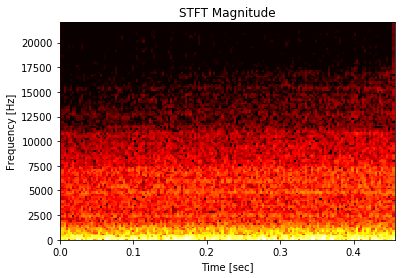

In [2]:
#!ls
wav_file = scipy.io.wavfile.read("02-Nangs.wav")
sample_rate = wav_file[0]

left_channel = wav_file[1][:,0]
left_channel = left_channel[200_000:220_000] # trim for now

f, t, Zxx = scipy.signal.stft(left_channel, fs=sample_rate)
abs_Zxx = np.abs(Zxx)

print(f.shape, t.shape, abs_Zxx.shape)
print(abs_Zxx.min())

plt.pcolormesh(t, f, abs_Zxx, norm=colors.LogNorm(vmin=1, vmax=abs_Zxx.max()), cmap='hot')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()